In [36]:
print('Hello')

Hello


Import libraries!

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset!

In [38]:
df = pd.read_csv(r"C:\Users\v-gurmadan\.virtualenvs\project-1-vzPNgHPN\Scripts\Advertising.csv")

Dataframe.head()

In [39]:
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


Heatmap to see correlations!

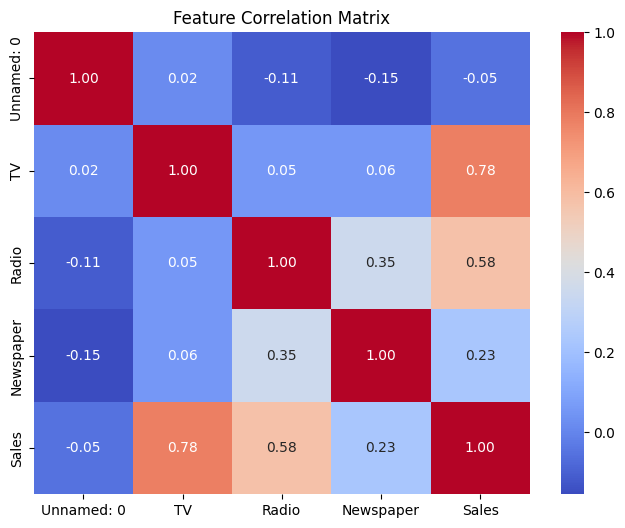

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Compute VIF!

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Select features
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display results
print(vif_data)

     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


Since VIF for each feature is < 5, we don't need to eliminate any of them

Let's create the model!

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train,y_train)

# Get model intercept and coefficients
intercept = model.intercept_
coefficients = dict(zip(x.columns,model.coef_))

intercept, coefficients




(np.float64(2.979067338122629),
 {'TV': np.float64(0.044729517468716326),
  'Radio': np.float64(0.18919505423437652),
  'Newspaper': np.float64(0.0027611143413671935)})

Mean Absolute Error, Mean Squared Error, RMSE, R2_score 

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
# r2_train = r2_score(y_train, y_pred)
average_sales = np.average(y)

print
(f"Mean Absolute Error (MAE): {mae} \
 Mean Squared Error (MSE): {mse} \
 Root Mean Squared Error (RMSE): {rmse} \
 R-squared (R²) Test: {r2_test} \
 Average: {average_sales} \
 RMSE % avg sales:{(rmse/average_sales)*100}%"
    # "RMSE % avg sales": (rmse/average_sales)*100 
    # "R-squared (R²) Train": r2_train
)




'Mean Absolute Error (MAE): 1.4607567168117603  Mean Squared Error (MSE): 3.1740973539761033  Root Mean Squared Error (RMSE): 1.78159966153345  R-squared (R²) Test: 0.899438024100912  Average: 14.0225  RMSE % avg sales:12.705292647769298%'

Residual Analyis

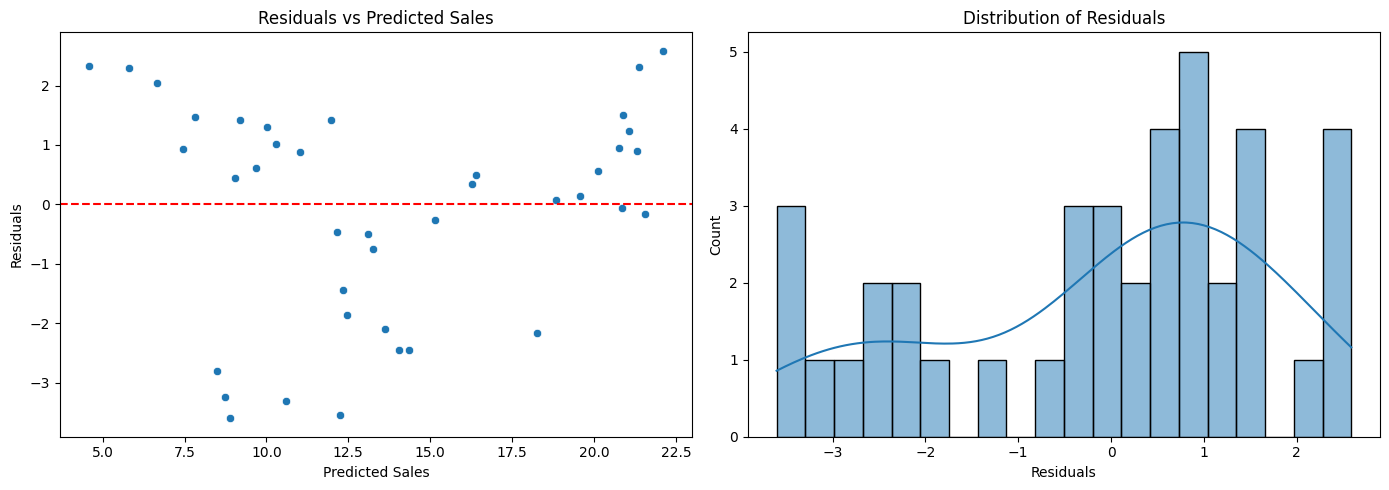

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Set up the plots
plt.figure(figsize=(14, 5))

# 1. Residuals vs Fitted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")

# 2. Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()


Using TV and Radio as features!

In [54]:
x=df[["TV","Radio"]]
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display results
print(vif_data)

  Feature       VIF
0      TV  2.238085
1   Radio  2.238085


In [ ]:
x=df[["TV","Radio"]]
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display results
print(vif_data)

  Feature       VIF
0      TV  2.238085
1   Radio  2.238085


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train,y_train)

# Get model intercept and coefficients
intercept = model.intercept_
coefficients = dict(zip(x.columns,model.coef_))

intercept, coefficients

(np.float64(3.028255250783305),
 {'TV': np.float64(0.04472830196637739),
  'Radio': np.float64(0.19066726454072783)})

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
# r2_train = r2_score(y_train, y_pred)
average_sales = np.average(y)

print
(f"Mean Absolute Error (MAE): {mae} \
 Mean Squared Error (MSE): {mse} \
 Root Mean Squared Error (RMSE): {rmse} \
 R-squared (R²) Test: {r2_test} \
 Average: {average_sales} \
 RMSE % avg sales:{(rmse/average_sales)*100}%"
    # "RMSE % avg sales": (rmse/average_sales)*100 
    # "R-squared (R²) Train": r2_train
)


'Mean Absolute Error (MAE): 1.4443023138227578  Mean Squared Error (MSE): 3.137948009068354  Root Mean Squared Error (RMSE): 1.7714254173033517  R-squared (R²) Test: 0.9005833101920356  Average: 14.0225  RMSE % avg sales:12.632736083461236%'

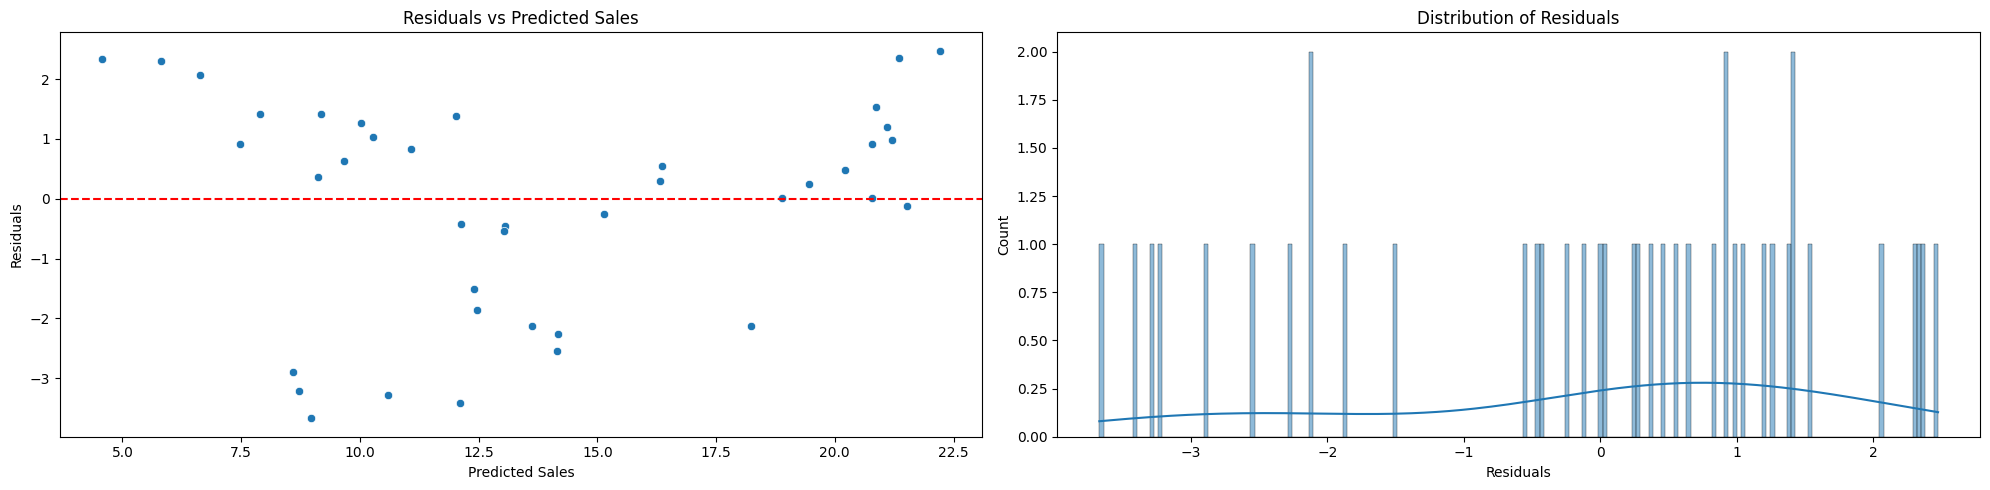

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Set up the plots
plt.figure(figsize=(20, 5))

# 1. Residuals vs Fitted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")

# 2. Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=200)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()

In [ ]:
x=df[["TV"]]
# # Compute VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["Feature"] = x.columns
# vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# # Display results
# print(vif_data)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train,y_train)

# Get model intercept and coefficients
intercept = model.intercept_
coefficients = dict(zip(x.columns,model.coef_))

intercept, coefficients




(np.float64(7.119638430592953), {'TV': np.float64(0.046529733705443346)})

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
# r2_train = r2_score(y_train, y_pred)
average_sales = np.average(y)

print
(f"Mean Absolute Error (MAE): {mae} \
 Mean Squared Error (MSE): {mse} \
 Root Mean Squared Error (RMSE): {rmse} \
 R-squared (R²) Test: {r2_test} \
 Average: {average_sales} \
 RMSE % avg sales:{(rmse/average_sales)*100}%"
    # "RMSE % avg sales": (rmse/average_sales)*100 
    # "R-squared (R²) Train": r2_train
)

'Mean Absolute Error (MAE): 2.444420003751042  Mean Squared Error (MSE): 10.204654118800956  Root Mean Squared Error (RMSE): 3.194472431998898  R-squared (R²) Test: 0.6766954295627076  Average: 14.0225  RMSE % avg sales:22.781047830264917%'

Using Radio as a feature

In [69]:
x=df[["Radio"]]
# # Compute VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["Feature"] = x.columns
# vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# # Display results
# print(vif_data)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train,y_train)

# Get model intercept and coefficients
intercept = model.intercept_
coefficients = dict(zip(x.columns,model.coef_))

intercept, coefficients

(np.float64(9.424065649663843), {'Radio': np.float64(0.2044068457292929)})

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
# r2_train = r2_score(y_train, y_pred)
average_sales = np.average(y)

print
(f"Mean Absolute Error (MAE): {mae} \
 Mean Squared Error (MSE): {mse} \
 Root Mean Squared Error (RMSE): {rmse} \
 R-squared (R²) Test: {r2_test} \
 Average: {average_sales} \
 RMSE % avg sales:{(rmse/average_sales)*100}%"
    # "RMSE % avg sales": (rmse/average_sales)*100 
    # "R-squared (R²) Train": r2_train
)

'Mean Absolute Error (MAE): 3.9298787572224847  Mean Squared Error (MSE): 23.248766588129108  Root Mean Squared Error (RMSE): 4.8216974799471926  R-squared (R²) Test: 0.2634309396999791  Average: 14.0225  RMSE % avg sales:34.3854339807252%'